In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks
from sklearn.preprocessing import minmax_scale

In [13]:
# Cook some sample data
time_points = np.arange(0,24,2)
period = 24
amplitude = 2
phase_shift = np.random.uniform(0, period)
data =  amplitude * np.sin(2 * np.pi * (np.array(time_points) - phase_shift) / period)

# Add some noise
noise_level = np.random.normal(amplitude/10, amplitude)
data += np.random.normal(0, noise_level, len(data))

In [14]:
# Normalize the data
data = minmax_scale(data)

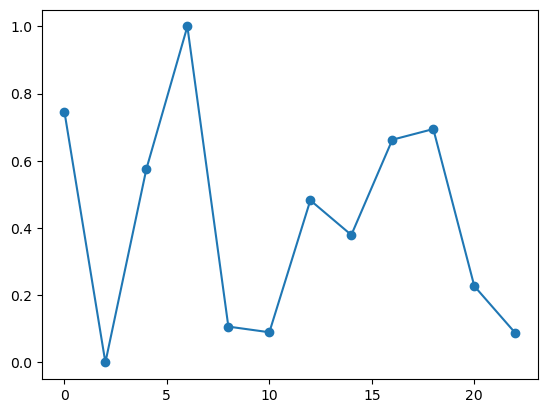

In [15]:
# Plot the data
plt.plot(time_points, data, 'o-')

In [16]:
# frequencies to test
f = np.linspace(0.01, 1, 1000)
len(f)

1000

In [17]:
# Run LS periodogram
frequency, power = LombScargle(time_points, data).autopower()

In [18]:
# Find peaks in the periodogram
peaks, _ = find_peaks(power)
peak_frequencies = frequency[peaks]
peaks, peak_frequencies

(array([ 11,  17,  27,  37,  43,  55,  66,  72,  82,  92,  98, 110, 121,
        127, 137, 147]),
 array([0.10454545, 0.15909091, 0.25      , 0.34090909, 0.39545455,
        0.50454545, 0.60454545, 0.65909091, 0.75      , 0.84090909,
        0.89545455, 1.00454545, 1.10454545, 1.15909091, 1.25      ,
        1.34090909]))

In [19]:
# Convert frequencies to periods
peak_periods = 1 / peak_frequencies

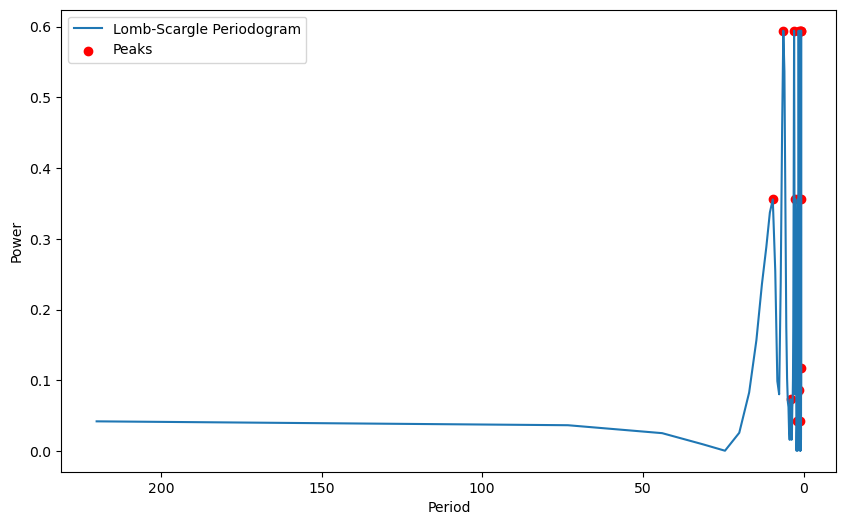

In [20]:
# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.plot(1 / frequency, power, label='Lomb-Scargle Periodogram')
plt.scatter(peak_periods, power[peaks], color='red', label='Peaks')
plt.xlabel('Period')
plt.ylabel('Power')
plt.legend()
plt.gca().invert_xaxis()

In [21]:
peak_periods

array([9.56521739, 6.28571429, 4.        , 2.93333333, 2.52873563,
       1.98198198, 1.65413534, 1.51724138, 1.33333333, 1.18918919,
       1.11675127, 0.99547511, 0.90534979, 0.8627451 , 0.8       ,
       0.74576271])